# Project - Statistical Performance Indicators (SPI)

![Data Science Workflow](files/img/DSworkflow.png)

## Goal of Project
- What can Statistical Performance Indicators (SPI) tells us?
- Investigate regional SPI score
- SPI correlation with GDP per capita

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Explore the problem
- [Read about the SPI on World Bank](https://www.worldbank.org/en/programs/statistical-performance-indicators/about-spi)
    - The SPI measure the capacity and maturity of national statistical systems by assessing the use of data, the quality of services, the coverage of topics, the sources of information, and the infrastructure and availability of resources.
    - The goal is to improve development outcomes and track progress toward the Sustainable Development Goals.
- Could there be regional differences on SPI?
- Do we expect SPI to be correlated to GDP per capita?

### Step 1.b: Identify and download data
- The World bank has data for SPI and GDP per capita
    - The data is downloaded already, but you can find it here:
        - [SPI](https://data.worldbank.org/indicator/IQ.SPI.OVRL)
        - [GDP per capita](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)

### Step 1.c: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.d: Read SPI data
- Use ```pd.read_csv()``` to read the files 
    - `files/SPI/API_IQ.SPI.OVRL_DS2_en_csv_v2_3186678.csv`
    - `files/SPI/Metadata_Country_API_IQ.SPI.OVRL_DS2_en_csv_v2_3186678.csv`
    - `files/SPI/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3159040.csv`
- NOTE: you might need to skip rows in some CSV files (`skiprows=4`)
- NOTE: Remember to assign the results to variables (e.g., `spi`, `meta`, `gdp`)
- Apply ```.head()``` on the data to see all is as expected

In [20]:
spi=pd.read_csv('files/API_/API_IQ.SPI.OVRL_DS2_en_csv_v2_4260422.csv',skiprows=4)
meta=pd.read_csv('files/API_/Metadata_Country_API_IQ.SPI.OVRL_DS2_en_csv_v2_4260422.csv')
gdp=pd.read_csv('files/API_/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4251004.csv',skiprows=4)

### Step 1.e: Inspect the data
- Check the data is as expected
- HINT: use `.head()` on the DataFrames

In [21]:
display(spi.head())
display(meta.head(2))
display(gdp.head(2))

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.222917,42.577917,49.845000,49.756250,NaN,NaN,NaN
3,Africa Western and Central,AFW,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,43.735417,46.689583,55.232083,54.945833,NaN,NaN,NaN


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26442.426801,26895.057167,28399.050131,28453.715565,29348.418969,30253.714235,31135.884356,23384.298791,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.726325,162.555968,172.271022,199.784916,180.228774,199.517228,...,1748.905594,1736.242220,1556.316469,1446.533624,1629.404273,1541.031661,1511.309259,1360.878645,1557.722682,NaN


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Remove columns
- We will only focus on 2019 from `spi` and `gdp`
- Only keep `Country Code`, `2019` from `spi` and `gdp`
- On `meta` keep `Country Code` and `Region`

In [22]:
spi=spi[['Country Code','2019']]
gdp=gdp[['Country Code','2019']]
meta=meta[['Country Code','Region']]

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- Use `len()` on DataFrame and on DataFrames where `dropna` is applied.

In [24]:
len(spi),len(spi.dropna())


(266, 174)

In [25]:
len(gdp),len(gdp.dropna())

(266, 255)

In [26]:
len(meta),len(meta.dropna())

(265, 217)

### Step 2.c: Drop rows
- Use `dropna()` on `spi` and `gdp` to remove missing data

In [27]:
spi=spi.dropna()
gdp=gdp.dropna()

In [28]:
spi.head()

,Country Code,2019
2,AFG,49.756250
4,AGO,54.945833
5,ALB,75.382917
8,ARE,59.669167
9,ARG,64.595833


In [29]:
gdp.head()

,Country Code,2019
0,ABW,31135.884356
1,AFE,1511.309259
2,AFG,494.179350
3,AFW,1777.852822
4,AGO,2177.799015


### Step 2.d: Rename columns
- We need to rename `2019` columns appropriate
- Rename `2019` to `SPI` in `spi`
    - HINT: Use `.rename(columns={'2019': 'SPI'})`
- Rename `2019` to `GDP per capita` in `gdp`

In [30]:
spi=spi.rename(columns={'2019':'SPI'})
gdp=gdp.rename(columns={'2019':'GDP per capita'})

In [31]:
spi

,Country Code,SPI
2,AFG,49.756250
4,AGO,54.945833
5,ALB,75.382917
8,ARE,59.669167
9,ARG,64.595833
...,...,...
260,WSM,57.047083
262,YEM,36.771250
263,ZAF,73.475000
264,ZMB,59.014167


In [32]:
gdp

,Country Code,GDP per capita
0,ABW,31135.884356
1,AFE,1511.309259
2,AFG,494.179350
3,AFW,1777.852822
4,AGO,2177.799015
...,...,...
261,XKX,4416.108358
262,YEM,750.554583
263,ZAF,6624.761865
264,ZMB,1305.001031


### Step 2.e: Merge data
- Use `merge` on `spi` with `gdp`
    - HINT: `spi.merge(gdp, how='inner', on='Country Code')`
    - HINT: Assign result to a new DataFrame (e.g., `dataset`)
- Use `merge` on `dataset` with `meta`
- Investigae length and head

In [35]:
dataset=spi.merge(gdp,how='inner',on='Country Code' )
dataset=dataset.merge(meta,how='inner',on='Country Code' )

In [37]:
dataset.head()

,Country Code,SPI,GDP per capita,Region
0,AFG,49.756250,494.179350,South Asia
1,AGO,54.945833,2177.799015,Sub-Saharan Africa
2,ALB,75.382917,5396.215864,Europe & Central Asia
3,ARE,59.669167,42701.443045,Middle East & North Africa
4,ARG,64.595833,10076.355241,Latin America & Caribbean


## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Visualize regional SPI
- Use `groupby(.)` on `Region` with `mean()`
- Create a bar plot on the mean SPI value

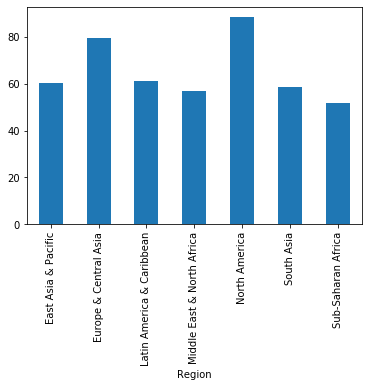

In [41]:
dataset.groupby('Region').mean()['SPI'].plot.bar()

### Step 3.b: Scatter plot SPI and GDP
- Create a scatter plot of `GDP per capita` on x-axis and `SPI` on y-axis.
- Try with logarithmic scale (add `logx=True` as argument.

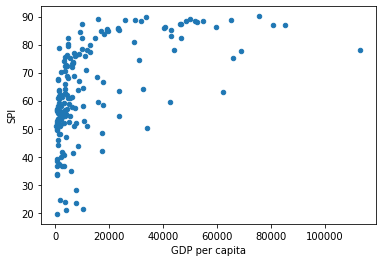

In [43]:
dataset.plot.scatter(x='GDP per capita',y='SPI')

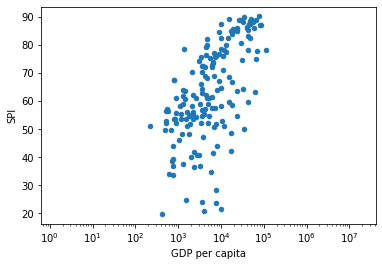

In [44]:
dataset.plot.scatter(x='GDP per capita',y='SPI',logx=True)

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Sort and make horizontal bar plot
- This will get you started in creating a plot
- Take the regional plot and sort it.
    - HINT: use `.sort_values(ascending=False)`
- Make the plot horizontal
    - HINT: use `.plot.barh()`
- Experiement further to find the plot you like

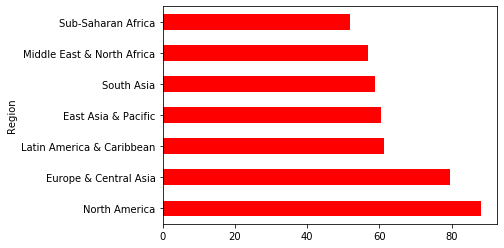

In [46]:
dataset.groupby('Region').mean()['SPI'].sort_values(ascending=False).plot.barh(color='red')

### Step 4.b: Add colors to regional plot
- Create a series of the colors based on the regional categories.
    - HINT: Use `factorize()` and assign the first index ([docs](https://pandas.pydata.org/docs/reference/api/pandas.factorize.html)).
- Make a color mapping in the scatter plot
    - HINT: Use argument `c=colors` (assuming you assigned the factorize result to `colors`
- Try to change color maps
    - HINT: Use `cmap='tab10'` (see other color maps in [docs](https://matplotlib.org/stable/tutorials/colors/colormaps.html))
- Play around until you get the plot you like

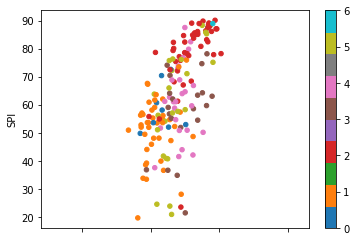

In [53]:
colors=dataset['Region'].factorize()[0]
dataset.plot.scatter(x='GDP per capita',y='SPI',c=colors,logx=True,cmap='tab10')

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a: Insights
- Any insights?
- Actions we need to do?
- How to measure it?